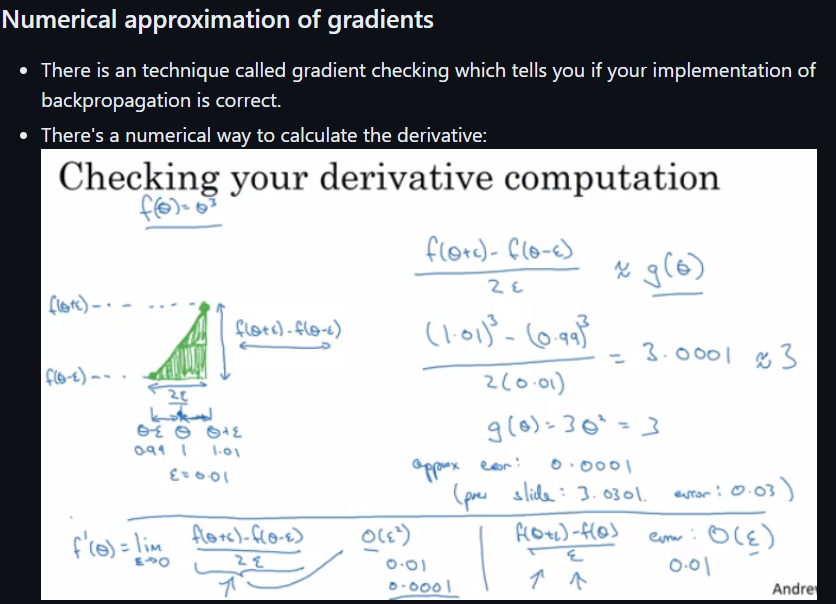

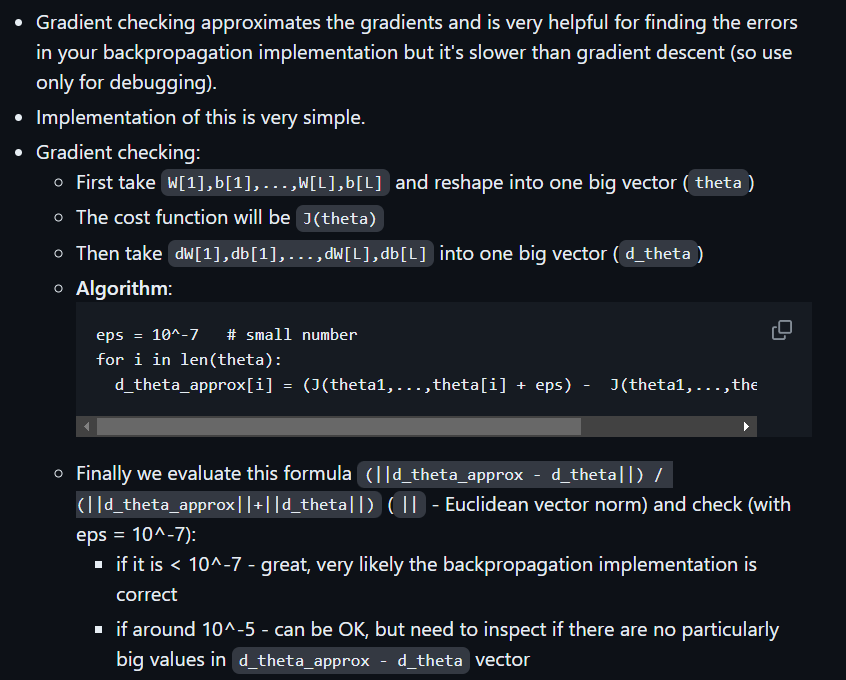

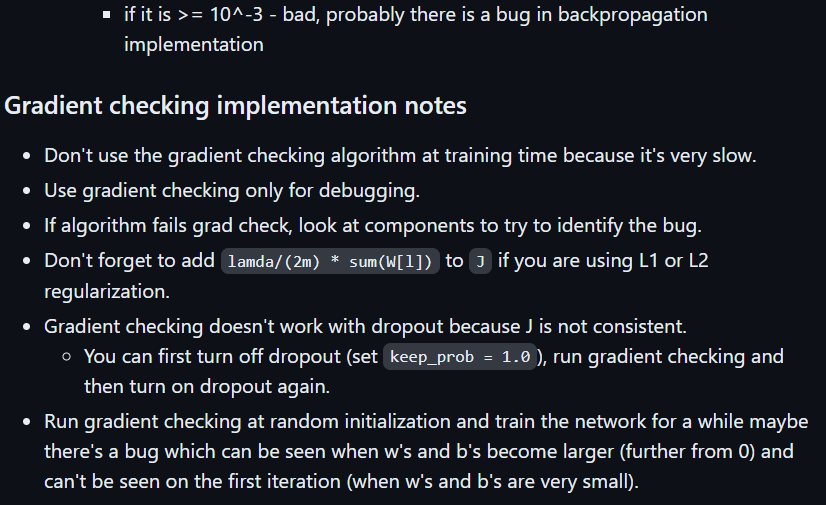

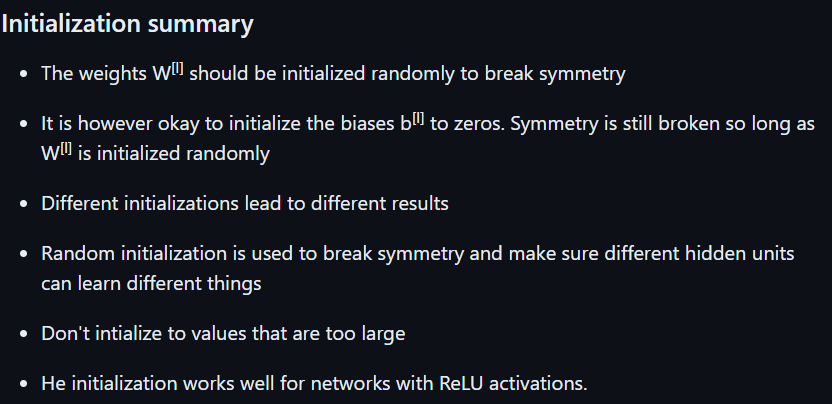

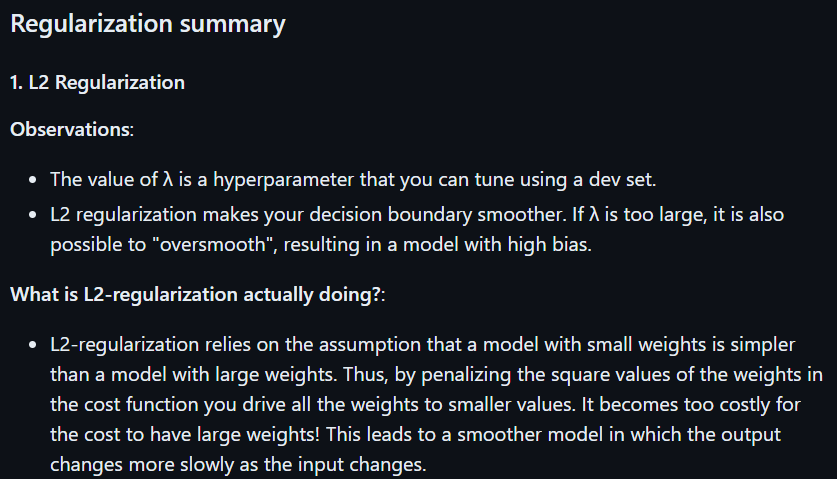

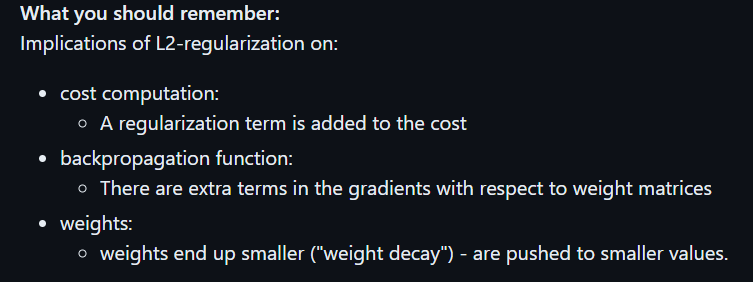

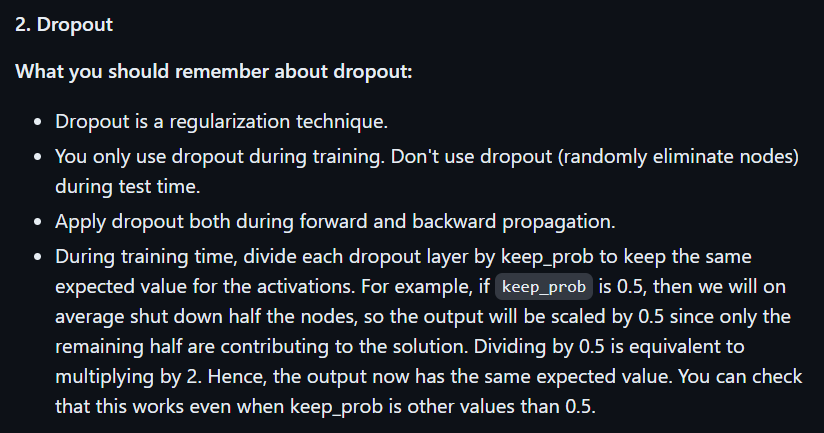

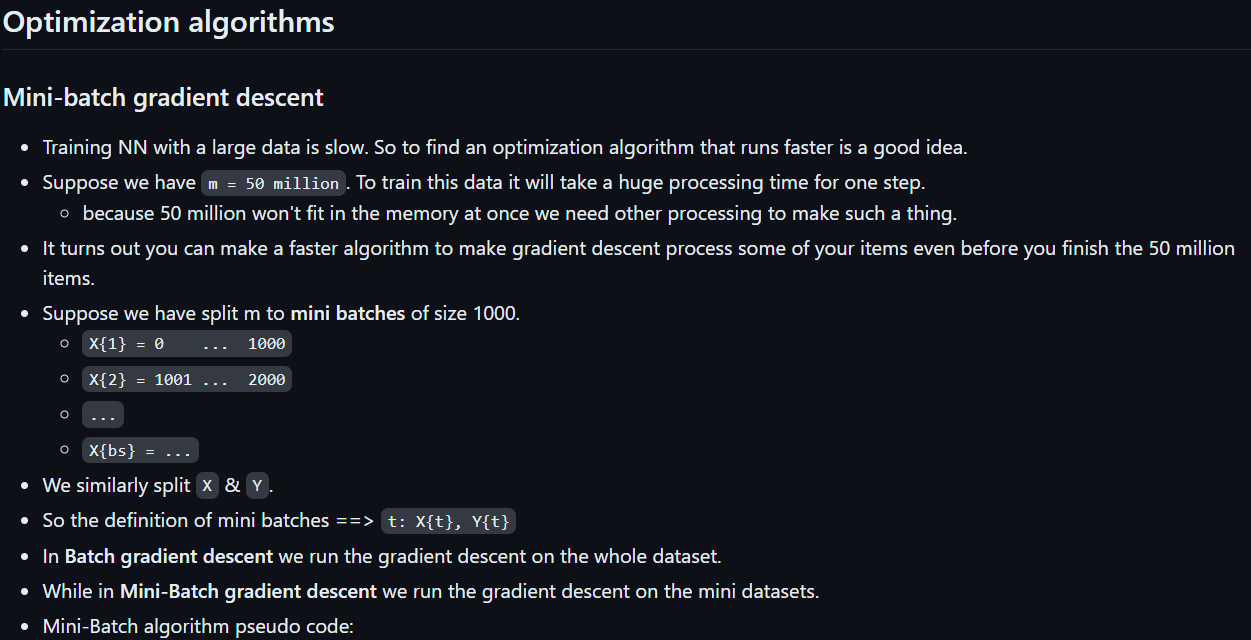

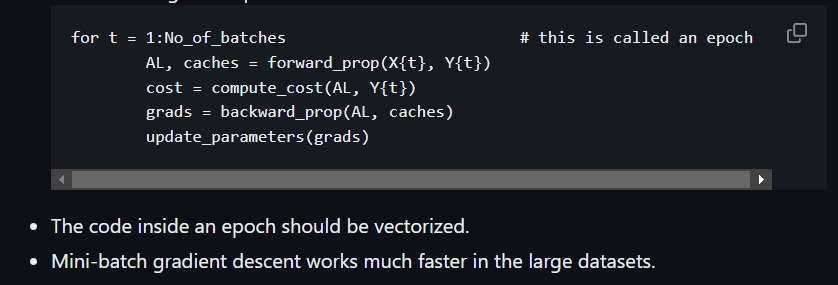

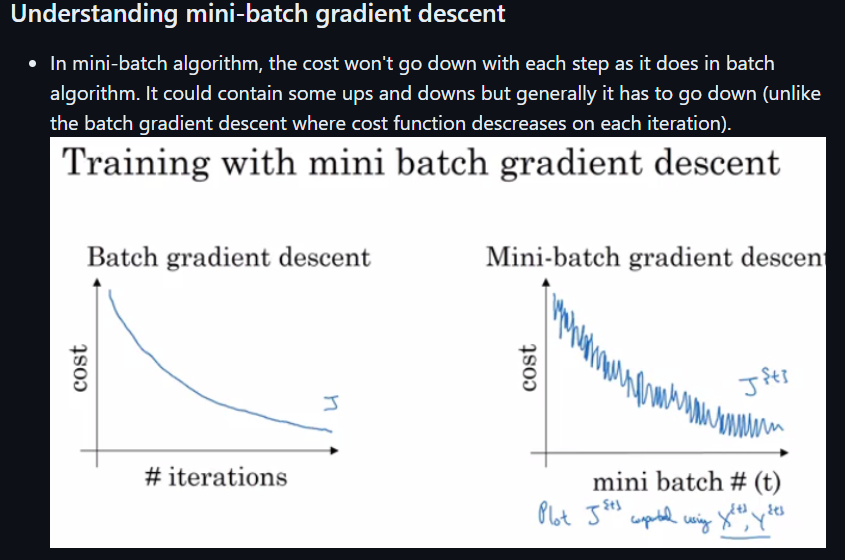

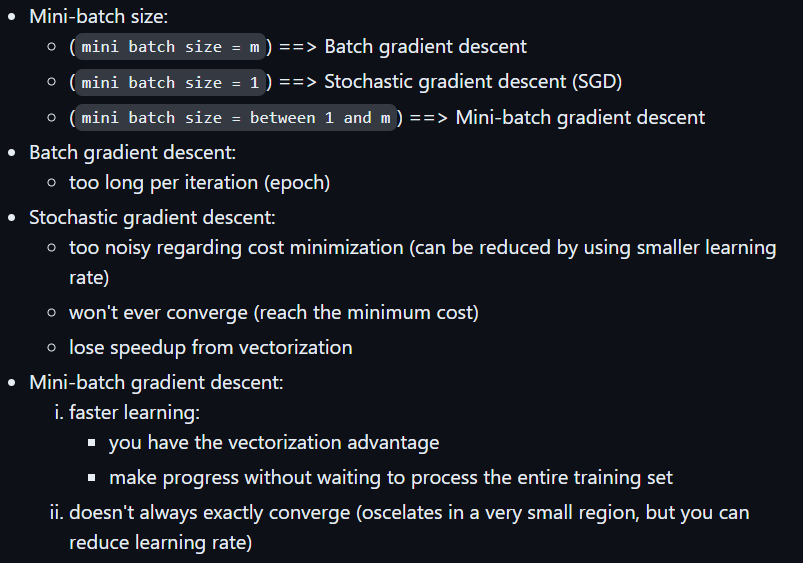

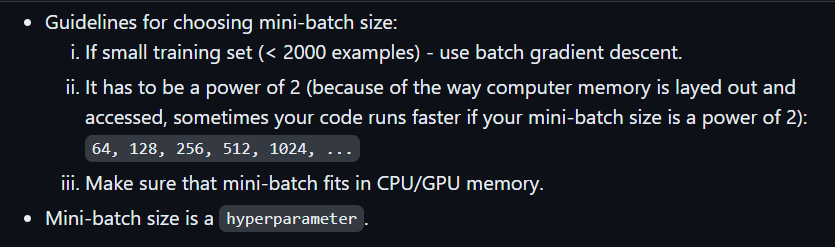

In [8]:
import numpy as np

# Helper functions for neural network operations

def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1  # Number of layers excluding input layer

    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2  # Number of layers in the neural network

    for l in range(1, L):
        A_prev = A
        Z = np.dot(parameters['W' + str(l)], A_prev) + parameters['b' + str(l)]
        A = relu(Z)
        cache = (A_prev, Z)
        caches.append(cache)

    # Output layer (sigmoid activation)
    ZL = np.dot(parameters['W' + str(L)], A) + parameters['b' + str(L)]
    AL = sigmoid(ZL)
    cache = (A, ZL)
    caches.append(cache)

    return AL, caches

def compute_cost(AL, Y):
    m = Y.shape[1]  # Number of examples
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    cost = np.squeeze(cost)  # Remove single-dimensional entries from the shape of an array
    return cost

def backward_propagation(AL, Y, caches, parameters):
    grads = {}
    L = len(caches)  # Number of layers

    # Derivative of cost with respect to AL
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Output layer gradient (sigmoid activation)
    current_cache = caches[L - 1]
    A_prev, ZL = current_cache
    dZL = AL - Y
    grads['dW' + str(L)] = np.dot(dZL, A_prev.T) / m
    grads['db' + str(L)] = np.sum(dZL, axis=1, keepdims=True) / m

    dA = np.dot(parameters['W' + str(L)].T, dZL)

    # Hidden layers gradients (relu activation)
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        A_prev, Z = current_cache
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        grads['dW' + str(l + 1)] = np.dot(dZ, A_prev.T) / m
        grads['db' + str(l + 1)] = np.sum(dZ, axis=1, keepdims=True) / m
        dA = np.dot(parameters['W' + str(l + 1)].T, dZ)

    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2  # Number of layers

    for l in range(1, L + 1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]

    return parameters

# Example training loop with mini-batch gradient descent

def train_neural_network(X, Y, layer_dims, learning_rate, num_epochs, batch_size):
    parameters = initialize_parameters(layer_dims)
    m = X.shape[1]  # Number of training examples
    No_of_batches = m // batch_size

    for epoch in range(1, num_epochs + 1):
        total_cost = 0

        for t in range(No_of_batches):
            # Get mini-batch
            batch_X = X[:, t * batch_size : (t + 1) * batch_size]
            batch_Y = Y[:, t * batch_size : (t + 1) * batch_size]

            # Forward propagation
            AL, caches = forward_propagation(batch_X, parameters)

            # Compute cost
            cost = compute_cost(AL, batch_Y)
            total_cost += cost

            # Backward propagation
            grads = backward_propagation(AL, batch_Y, caches, parameters)

            # Update parameters
            parameters = update_parameters(parameters, grads, learning_rate)

        avg_cost = total_cost / No_of_batches
        print(f"Epoch {epoch}/{num_epochs}, Average Cost: {avg_cost:.6f}")

    return parameters

# Example usage:

# Generate synthetic dataset
np.random.seed(0)
m = 1000
n_features = 20
X = np.random.randn(n_features, m)
Y = np.random.randint(0, 2, (1, m))

layer_dims = [n_features, 10, 5, 1]  # Define the neural network architecture
learning_rate = 0.01
num_epochs = 50
batch_size = 64

# Train the neural network
trained_parameters = train_neural_network(X, Y, layer_dims, learning_rate, num_epochs, batch_size)


Epoch 1/50, Average Cost: 0.693148
Epoch 2/50, Average Cost: 0.693147
Epoch 3/50, Average Cost: 0.693145
Epoch 4/50, Average Cost: 0.693144
Epoch 5/50, Average Cost: 0.693142
Epoch 6/50, Average Cost: 0.693141
Epoch 7/50, Average Cost: 0.693139
Epoch 8/50, Average Cost: 0.693138
Epoch 9/50, Average Cost: 0.693137
Epoch 10/50, Average Cost: 0.693135
Epoch 11/50, Average Cost: 0.693134
Epoch 12/50, Average Cost: 0.693132
Epoch 13/50, Average Cost: 0.693131
Epoch 14/50, Average Cost: 0.693129
Epoch 15/50, Average Cost: 0.693128
Epoch 16/50, Average Cost: 0.693127
Epoch 17/50, Average Cost: 0.693125
Epoch 18/50, Average Cost: 0.693124
Epoch 19/50, Average Cost: 0.693122
Epoch 20/50, Average Cost: 0.693121
Epoch 21/50, Average Cost: 0.693120
Epoch 22/50, Average Cost: 0.693118
Epoch 23/50, Average Cost: 0.693117
Epoch 24/50, Average Cost: 0.693116
Epoch 25/50, Average Cost: 0.693114
Epoch 26/50, Average Cost: 0.693113
Epoch 27/50, Average Cost: 0.693112
Epoch 28/50, Average Cost: 0.693110
E

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Extract features and target
X = housing.data
y = housing.target

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer, no activation for regression
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Define mini-batch size and number of epochs
batch_size = 32
num_epochs = 50

# Mini-batch gradient descent training loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    for batch_start in range(0, len(X_train_scaled), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_scaled[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]
        model.train_on_batch(X_batch, y_batch)

    # Evaluate the model on validation data
    val_loss = model.evaluate(X_val_scaled, y_val, verbose=0)
    print(f"Validation loss: {val_loss:.4f}")

print("Training complete!")

# Optionally, you can make predictions using the trained model
# predictions = model.predict(X_val_scaled)

Epoch 1/50
Validation loss: 0.4821
Epoch 2/50
Validation loss: 0.4334
Epoch 3/50
Validation loss: 0.4120
Epoch 4/50
Validation loss: 0.3985
Epoch 5/50
Validation loss: 0.3882
Epoch 6/50
Validation loss: 0.3793
Epoch 7/50
Validation loss: 0.3716
Epoch 8/50
Validation loss: 0.3663
Epoch 9/50
Validation loss: 0.3608
Epoch 10/50
Validation loss: 0.3556
Epoch 11/50
Validation loss: 0.3520
Epoch 12/50
Validation loss: 0.3478
Epoch 13/50
Validation loss: 0.3431
Epoch 14/50
Validation loss: 0.3394
Epoch 15/50
Validation loss: 0.3355
Epoch 16/50
Validation loss: 0.3320
Epoch 17/50
Validation loss: 0.3310
Epoch 18/50
Validation loss: 0.3276
Epoch 19/50
Validation loss: 0.3249
Epoch 20/50
Validation loss: 0.3224
Epoch 21/50
Validation loss: 0.3208
Epoch 22/50
Validation loss: 0.3188
Epoch 23/50
Validation loss: 0.3163
Epoch 24/50
Validation loss: 0.3146
Epoch 25/50
Validation loss: 0.3131
Epoch 26/50
Validation loss: 0.3111
Epoch 27/50
Validation loss: 0.3101
Epoch 28/50
Validation loss: 0.3085
E

In [14]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Step 1: Load and prepare the dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model using Mini-Batch Gradient Descent
batch_size = 32
epochs = 100

# Get the number of training examples
m = X_train.shape[0]

# Training loop with mini-batch gradient descent
for epoch in range(epochs):
    # Shuffle the training data
    indices = np.random.permutation(m)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Mini-batch training
    for i in range(0, m, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Perform one step of mini-batch gradient descent
        loss = model.train_on_batch(X_batch, y_batch)

    # Print the loss and accuracy at the end of each epoch
    if (epoch + 1) % 10 == 0:
        loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
        print(f'Epoch {epoch + 1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Step 4: Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 10, Loss: 0.6029, Accuracy: 0.9083
Epoch 20, Loss: 0.5068, Accuracy: 0.9167
Epoch 30, Loss: 0.4530, Accuracy: 0.9417
Epoch 40, Loss: 0.4141, Accuracy: 0.9583
Epoch 50, Loss: 0.3831, Accuracy: 0.9500
Epoch 60, Loss: 0.3505, Accuracy: 0.9500
Epoch 70, Loss: 0.3040, Accuracy: 0.9500
Epoch 80, Loss: 0.2846, Accuracy: 0.9583
Epoch 90, Loss: 0.2676, Accuracy: 0.9667
Epoch 100, Loss: 0.2532, Accuracy: 0.9667
1/1 [==============================] - 0s 25ms/step - loss: 0.2622 - accuracy: 1.0000
Test Loss: 0.2622
Test Accuracy: 1.0000


#Stochastic Gradient Descent

In [13]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load and prepare the dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model using stochastic gradient descent (SGD)
batch_size = 32
epochs = 100

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
4/4 [==============================] - 2s 129ms/step - loss: 1.1132 - accuracy: 0.3148 - val_loss: 1.0113 - val_accuracy: 0.4167
Epoch 2/100
4/4 [==============================] - 0s 39ms/step - loss: 0.9607 - accuracy: 0.3426 - val_loss: 0.9493 - val_accuracy: 0.1667
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 0.9096 - accuracy: 0.4907 - val_loss: 0.9431 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 0.8670 - accuracy: 0.6481 - val_loss: 0.8997 - val_accuracy: 0.5833
Epoch 5/100
4/4 [==============================] - 0s 37ms/step - loss: 0.8395 - accuracy: 0.6852 - val_loss: 0.8962 - val_accuracy: 0.5833
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.8080 - accuracy: 0.6852 - val_loss: 0.8733 - val_accuracy: 0.4167
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7807 - accuracy: 0.6481 - val_loss: 0.8569 - val_accuracy: 0.5833
Epoch 8/100
4/4 [==

#Batch Gradient Descent

In [15]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load and prepare the dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model using Batch Gradient Descent
epochs = 100

# Get the number of training examples
m = X_train.shape[0]

# Training loop with batch gradient descent
for epoch in range(epochs):
    # Perform forward pass to compute loss
    with tf.GradientTape() as tape:
        logits = model(X_train)
        loss_value = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_train, logits))

    # Compute gradients
    gradients = tape.gradient(loss_value, model.trainable_variables)

    # Update model weights
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the loss and accuracy at the end of each epoch
    if (epoch + 1) % 10 == 0:
        loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
        print(f'Epoch {epoch + 1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Step 4: Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 10, Loss: 0.9742, Accuracy: 0.5500
Epoch 20, Loss: 0.8492, Accuracy: 0.5000
Epoch 30, Loss: 0.8130, Accuracy: 0.5417
Epoch 40, Loss: 0.7806, Accuracy: 0.7250
Epoch 50, Loss: 0.7495, Accuracy: 0.8083
Epoch 60, Loss: 0.7197, Accuracy: 0.8417
Epoch 70, Loss: 0.6911, Accuracy: 0.8417
Epoch 80, Loss: 0.6638, Accuracy: 0.8500
Epoch 90, Loss: 0.6379, Accuracy: 0.8667
Epoch 100, Loss: 0.6135, Accuracy: 0.9000
1/1 [==============================] - 0s 107ms/step - loss: 0.6083 - accuracy: 0.8333
Test Loss: 0.6083
Test Accuracy: 0.8333
